# Combining all time series data, prepared from the individual datasets.  
### This data will also be checked for missing values and outliers, and trend analysis carried out.

In [1]:
# Import relevant libraries
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Combine all three cleaned datasets, US, UK and the Statista data.

In [2]:
# Loading the UK breaches dataset...please load from own local machine

uk_incidents_resampled_file_path = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/uk_incidents_resampled.csv'
uk_incidents_resampled = pd.read_csv(uk_incidents_resampled_file_path)

us_incidents_file_path = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/us_incidents.csv'
us_incidents = pd.read_csv(us_incidents_file_path)


statista_df_resampled_file_path = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/statista_df_resampled.csv'
statista_df_resampled = pd.read_csv(statista_df_resampled_file_path)

uk_incidents_resampled, us_incidents, statista_df_resampled


(          Year  no_of_attacks
 0   2017-01-31           2416
 1   2017-02-28           2416
 2   2017-03-31           2416
 3   2017-04-30           2416
 4   2017-05-31           2416
 ..         ...            ...
 56  2021-09-30            372
 57  2021-10-31            372
 58  2021-11-30            372
 59  2021-12-31            372
 60  2022-01-31            856
 
 [61 rows x 2 columns],
            Year  no_of_attacks
 0    2014-01-31             36
 1    2014-02-28             24
 2    2014-03-31             34
 3    2014-04-30             38
 4    2014-05-31             16
 ..          ...            ...
 103  2022-08-31             21
 104  2022-09-30             32
 105  2022-10-31             19
 106  2022-11-30              6
 107  2022-12-31              4
 
 [108 rows x 2 columns],
           Year  no_of_attacks
 0   2016-01-31        35713.0
 1   2016-02-29        35713.0
 2   2016-03-31        35713.0
 3   2016-04-30        35713.0
 4   2016-05-31        35713.0
 ..  

<font size = '3.5'>
If there is an overlap in dates between the dataframes, the no_of_attacks will be the sum of the attacks from all the datasets for that month.
If a month is present in only one or two of the datasets but not in the others, the no_of_attacks for that month will only consider the datasets where the month is present.
</font>

In [3]:
# Merge the dataframes on 'Year' and sum the 'no_of_attacks' for each month
final_time_series = pd.concat([uk_incidents_resampled, us_incidents, statista_df_resampled]).groupby('Year').sum().reset_index()

final_time_series.head()


,Year,no_of_attacks
0,2014-01-31,36.0
1,2014-02-28,24.0
2,2014-03-31,34.0
3,2014-04-30,38.0
4,2014-05-31,16.0


## Plotting the final time series data.

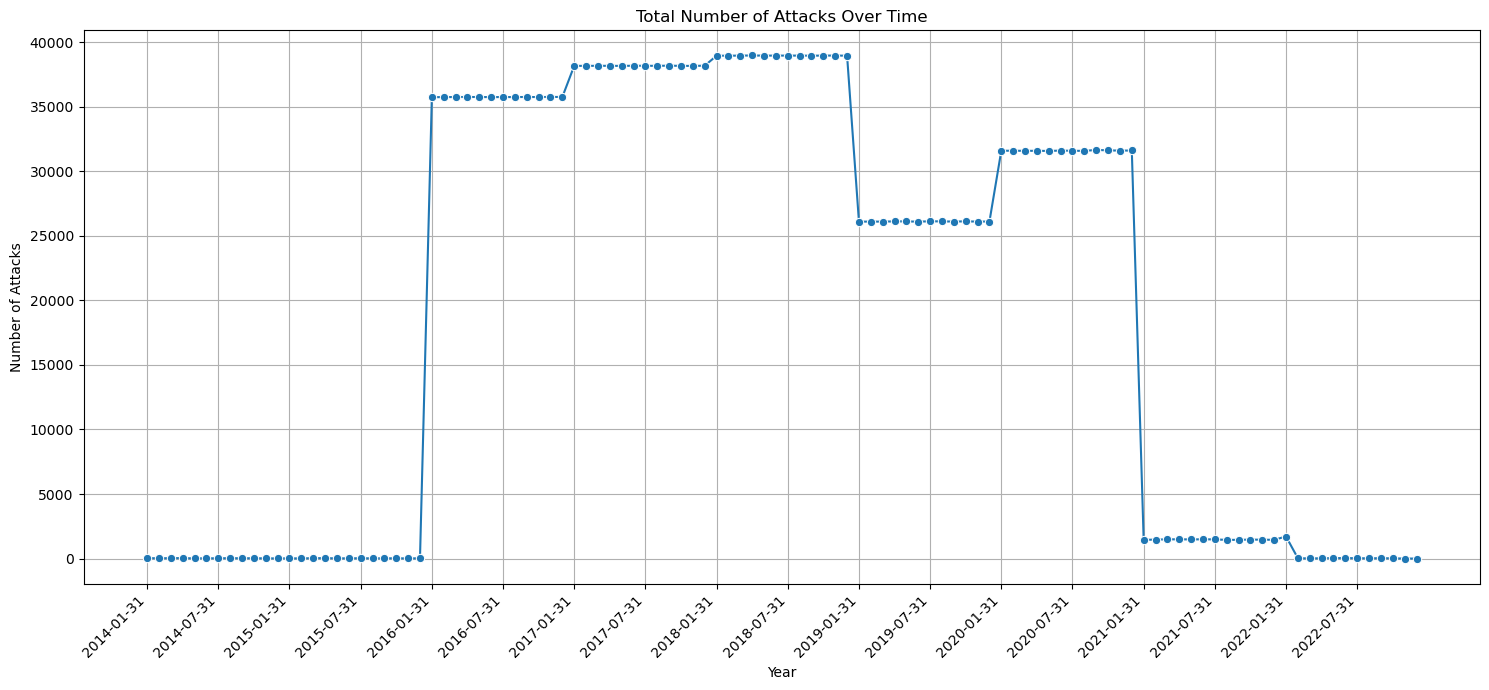

In [4]:

# Adjusting the x-ticks to display every six months
xticks = final_time_series['Year'][::6]

# Using Seaborn for plotting
plt.figure(figsize=(15, 7))
sns.lineplot(data=final_time_series, x='Year', y='no_of_attacks', marker='o', linestyle='-')
plt.title('Total Number of Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(xticks, rotation=45, ha='right')  # Display x-axis ticks every six months
plt.grid(True)
plt.tight_layout()
plt.show()



## Checking for Outliers

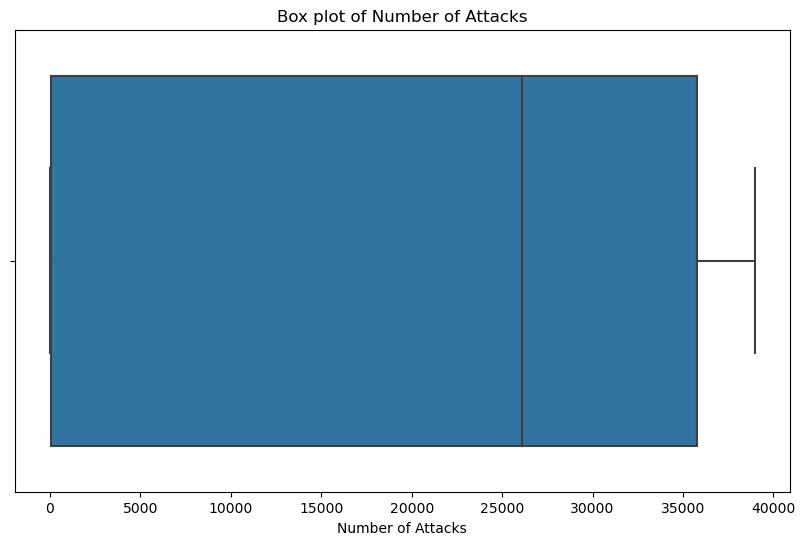

In [5]:
# Using Seaborn to create a box plot for 'no_of_attacks' to visualize potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_time_series['no_of_attacks'])
plt.title('Box plot of Number of Attacks')
plt.xlabel('Number of Attacks')
plt.show()


In [6]:
# Using z scores to check for outliers

from scipy.stats import zscore

# Calculate Z-scores for 'no_of_attacks'
final_time_series['Z_score'] = zscore(final_time_series['no_of_attacks'])

# Identify outliers using the Z-score method (Z > 3 or Z < -3)
outliers = final_time_series[abs(final_time_series['Z_score']) > 3]

outliers


,Year,no_of_attacks,Z_score


<font size = '3.5'>
 No outliers detected
 </font>

In [7]:
# drop the z score column as data will be saved as final_time_series
# Dropping the Z_score column
final_time_series.drop('Z_score', axis=1, inplace=True)

# Displaying the first few rows of the updated dataframe
final_time_series.head()


,Year,no_of_attacks
0,2014-01-31,36.0
1,2014-02-28,24.0
2,2014-03-31,34.0
3,2014-04-30,38.0
4,2014-05-31,16.0


In [8]:
# Saving the aggregated dataset to a CSV file

#save_path_series = '/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/final_time_series.csv'

#final_time_series.to_csv(save_path_series, index=False)

#save_path_series


'/Users/gorji1/Desktop/MSC_RESEARCH_PROJECT/Data_sets/final_time_series.csv'

## Data sources:  
### 1. UK data services
### 2. US Dept.of Health
### 3. Statista

### This script is part of the author's research project, initial stage: Data Cleaning.


    
### This script can be reproduced without permission.
    


### Author : Chinyere.O.Ugorji &copy; 2023


In [9]:
import sys
print(sys.version)


3.10.12 (main, Jul  5 2023, 14:49:34) [Clang 14.0.6 ]
